In [1]:
#WordCloud for iNaturalist project descriptions
  
# importing modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import re
from stop_words import get_stop_words

In [2]:
def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext
  

In [3]:
# Read projects file  
df = pd.read_csv(r"iNatProject.csv", encoding ="utf-8") 
#df = pd.read_csv(r"test.csv", encoding ="utf-8") 

# Remove projects with one or no observers and at least on identifier.

In [4]:
df = df[(df['observers']>1) & (df['identifiers']>=1)]

In [5]:
comment_words = '' 
#stopwords = set(STOPWORDS) 
#stopwords.update(["de", "la", "bioblitz","will","que","se",""])
stopwords = get_stop_words('en')
stopwordsES = get_stop_words('es')
#stopwords = set(stopwords)


In [6]:
stopwords.extend(stopwordsES)

In [7]:
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [8]:
stopwords = set(stopwords)

In [9]:
stopwords.add('bioblitz')
stopwords.add('https')
stopwords.add('www')
stopwords.add('org')
stopwords.add('inaturalist')
stopwords.add('project')

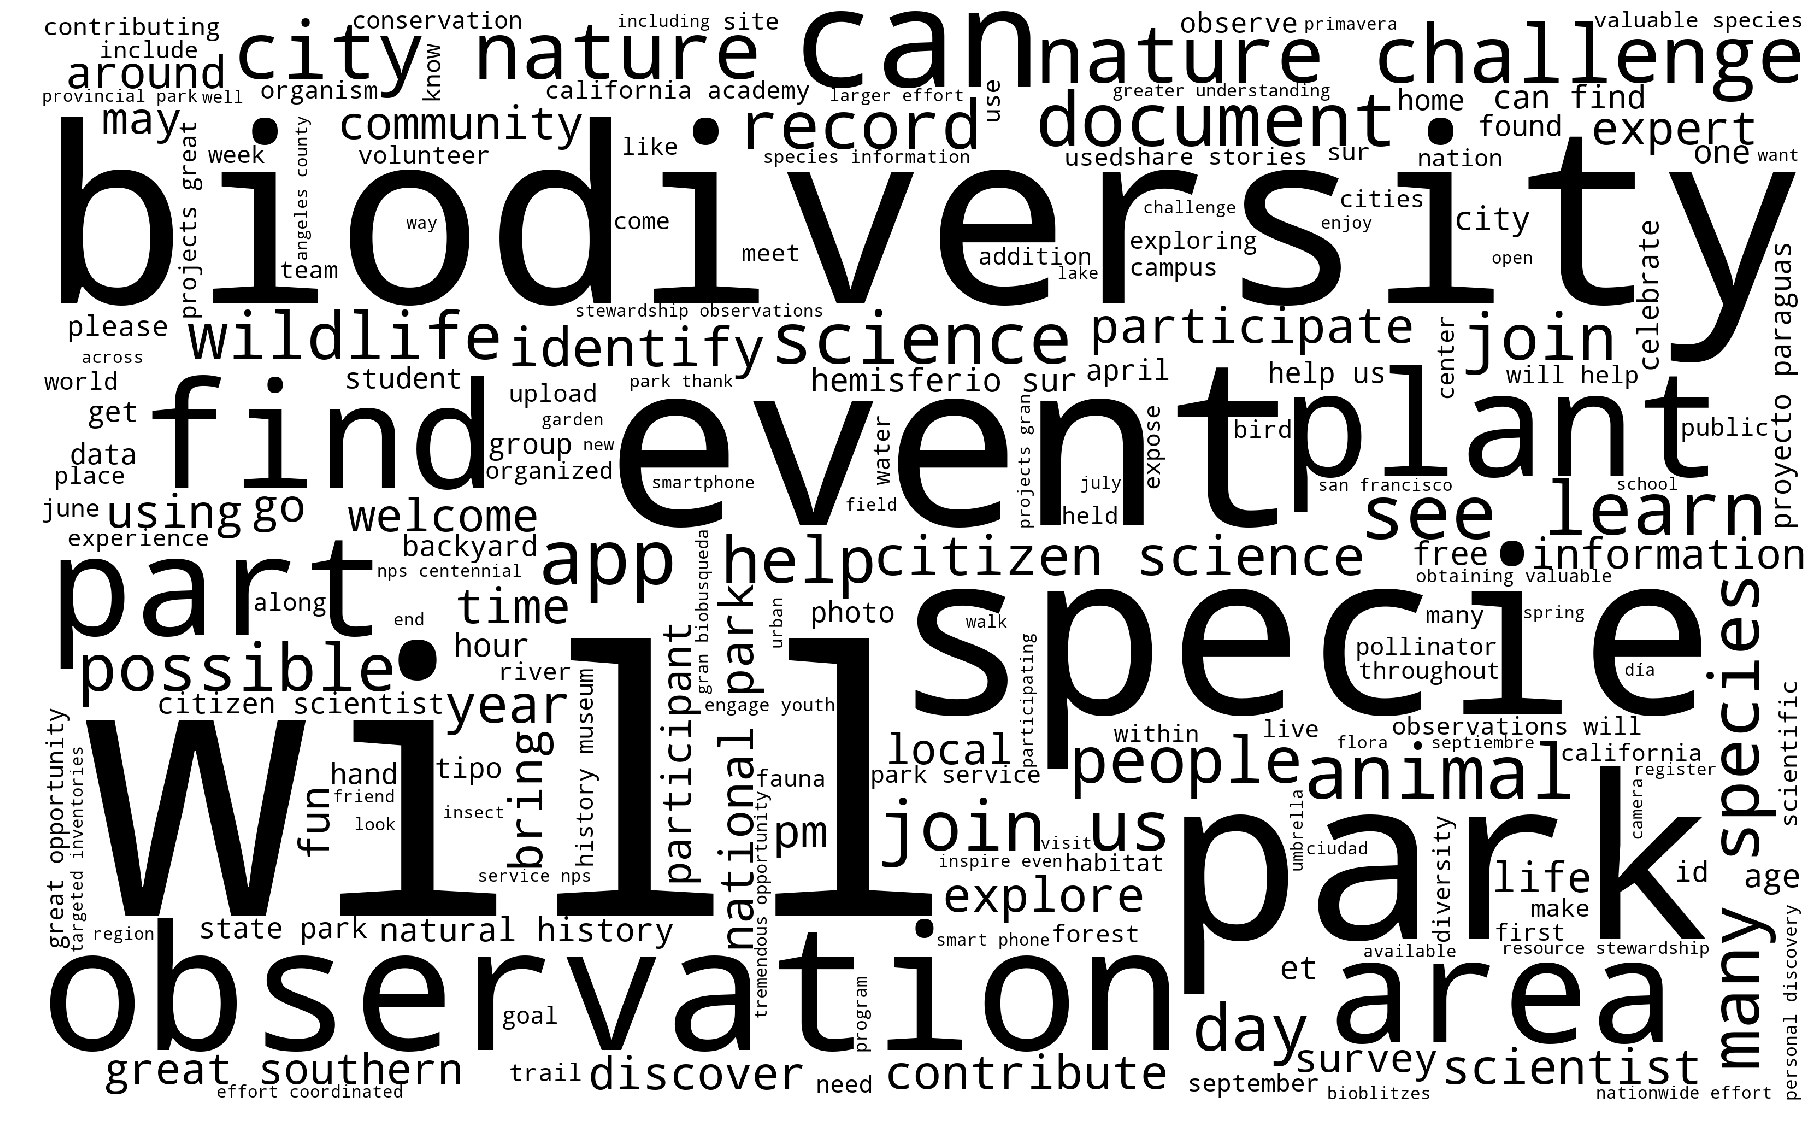

In [10]:
# iterate through the csv file 
for val in df.description: 

    # typecaste each val to string 
    val = str(val) 
    val = cleanhtml(val)
    # split the value 
    tokens = val.split() 
    #print(tokens)      
    # Converts each token into lowercase 
    for i in range(len(tokens)):

        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 3236, height = 2000, 
                background_color ='white', 
                stopwords = stopwords, 
                #normalize_plurals = False,
                color_func=lambda *args, **kwargs: (0,0,0),
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (25, 25), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [11]:
wordcloud.to_file("wordcloud.jpg")

In [12]:
df

,Unnamed: 0,createdAt,description,duration,end,hours,identifiers,isUmbrella,location,observationRule,...,observers,placeID,projectID,projectType,project_type,rulePreferences,searchParameters,slug,species,start
0,0,2013-05-07T18:40:58+00:00,Looking for the 2016 McLaren Bioblitz? <a href...,1 days 23:00:00.000000000,2013-05-11 23:00:00,47.000000,202,False,"37.717475,-122.4207644501","[{'id': 7104, 'operator': 'observed_in_place?'...",...,44,51166,876,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2013-05-10T00:00:00...",mclaren-park-bioblitz-2013,316,2013-05-10 00:00:00
1,1,2013-09-23T09:49:27+00:00,NaN,0 days 23:00:00.000000000,2013-08-24 23:00:00,23.000000,125,False,"37.71941,-122.503615","[{'id': 1337, 'operator': 'observed_in_place?'...",...,23,52926,1262,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2013-08-24T00:00:00...",fort-funston-bioblitz,191,2013-08-24 00:00:00
2,2,2013-10-04T12:41:20+00:00,"<a href=""http://www.adkinsarboretum.org/"">Adki...",0 days 23:59:00.000000000,2013-10-06 22:59:00,23.983333,105,False,"38.953895,-75.937495","[{'id': 1361, 'operator': 'observed_in_place?'...",...,10,53311,1306,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2013-10-05T23:00:00...",adkins-bioblitz,148,2013-10-05 23:00:00
3,3,2013-10-04T12:16:53+00:00,"The mission of the <a href=""http://www.bayrest...",0 days 23:59:00.000000000,2013-10-05 22:59:00,23.983333,101,False,"38.94955,-76.224995",[],...,13,57188,1305,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2013-10-04T23:00:00...",cbec-bioblitz,123,2013-10-04 23:00:00
4,4,2014-02-28T20:37:41+00:00,NaN,1 days 00:00:00.000000000,2013-10-06 00:00:00,24.000000,167,False,"37.521905,-122.321045","[{'id': 7116, 'operator': 'observed_in_place?'...",...,36,51179,1672,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2013-10-05T00:00:00...",laurelwood-sugarloaf-bioblitz,272,2013-10-05 00:00:00
5,5,2015-02-26T15:39:12+00:00,"On August 26-27, 2013, Macaulay Honors College...",1 days 00:00:00.000000000,2013-08-27 15:00:00,24.000000,119,False,"40.78255,-73.96563",[],...,61,49955,3649,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2013-08-26T15:00:00...",2013-macaulay-honors-college-central-park-biob...,227,2013-08-26 15:00:00
9,0,2014-02-28T16:59:44+00:00,Thank you Citizen Scientists for becoming part...,1 days 23:59:00.000000000,2014-03-29 23:59:00,47.983333,471,False,"37.7785515673,-122.5507087159","[{'id': 7115, 'operator': 'observed_in_place?'...",...,341,9912,1670,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2014-03-28T00:00:00...",golden-gate-national-parks-bioblitz-march-28th...,1833,2014-03-28 00:00:00
10,1,2014-04-14T05:13:31+00:00,<p>Join us in San Francisco for a <strong>gras...,0 days 07:00:00.000000000,2014-05-04 17:00:00,7.000000,186,False,"37.7526268252,-122.4701678753",[],...,36,63217,1862,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2014-05-04T10:00:00...",green-hairstreak-butterfly-bioblitz,337,2014-05-04 10:00:00
11,2,2013-12-18T04:33:52+00:00,<p><strong>Help us explore America's oldest wi...,0 days 08:00:00.000000000,2014-02-23 17:00:00,8.000000,202,False,"37.8026279429,-122.255245",[],...,67,50926,1519,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2014-02-23T09:00:00...",lake-merritt-bioblitz,328,2014-02-23 09:00:00
12,3,2014-08-15T18:14:28+00:00,Join us at Memorial Park in Loma Mar (9500 Pes...,1 days 05:00:00.000000000,2014-09-27 14:00:00,29.000000,114,False,"37.2785942886,-122.2941827774",[],...,28,57014,2463,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2014-09-26T09:00:00...",memorial-park-bioblitz-2014,245,2014-09

In [13]:
import time
from datetime import datetime, timedelta, date

In [14]:
df.start[0]

'2013-05-10 00:00:00'

In [15]:
datetime.strptime(df.start[0],'%Y-%m-%d %H:%M:%S').month

5

In [32]:
monthOfTheYear = {}
monthOfTheYear[0] = 0
monthOfTheYear[1] = 0
monthOfTheYear[2] = 0
monthOfTheYear[3] = 0
monthOfTheYear[4] = 0
monthOfTheYear[5] = 0
monthOfTheYear[6] = 0
monthOfTheYear[7] = 0
monthOfTheYear[8] = 0
monthOfTheYear[9] = 0
monthOfTheYear[10] = 0
monthOfTheYear[11] = 0
monthOfTheYear[12] = 0
weekday ={}
weekday[0] = 0
weekday[1] = 0
weekday[2] = 0
weekday[3] = 0
weekday[4] = 0
weekday[5] = 0
weekday[6] = 0

In [33]:
day = datetime.now()

for index, row in df.iterrows():
    #print(datetime.strptime(row['start'],'%Y-%m-%d %H:%M:%S').weekday())
    day = datetime.strptime(row['start'],'%Y-%m-%d %H:%M:%S')
    mon = day.date().month
    monthOfTheYear[mon] = monthOfTheYear[mon] + 1
    while day <= (datetime.strptime(row['end'],'%Y-%m-%d %H:%M:%S')):
        #print(row['start'],row['end'],(datetime.strptime(row['end'],'%Y-%m-%d %H:%M:%S') - datetime.strptime(row['start'],'%Y-%m-%d %H:%M:%S')).days)
        #print(day.weekday())
        #weekday[datetime.strptime(row['start'],'%Y-%m-%d %H:%M:%S').weekday()] = weekday[datetime.strptime(row['start'],'%Y-%m-%d %H:%M:%S').weekday()]+1
        weekday[day.weekday()] = weekday[day.weekday()] + 1
        
        day = day + timedelta(days=1)

In [34]:
weekday

{0: 901, 1: 570, 2: 612, 3: 697, 4: 1381, 5: 1693, 6: 1251}

In [35]:
daysOfTheWeek = {}
daysOfTheWeek['Monday'] = weekday[0]
daysOfTheWeek['Tuesday'] = weekday[1]
daysOfTheWeek['Wednesday'] = weekday[2]
daysOfTheWeek['Thursday'] = weekday[3]
daysOfTheWeek['Friday'] = weekday[4]
daysOfTheWeek['Saturday'] = weekday[5]
daysOfTheWeek['Sunday'] = weekday[6]

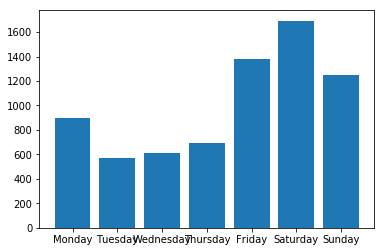

In [36]:
plt.bar(*zip(*daysOfTheWeek.items()))
plt.show()

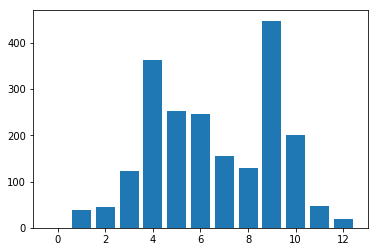

In [37]:
plt.bar(*zip(*monthOfTheYear.items()))
plt.show()

In [29]:
df[['latitude','longitude']] = df.location.str.split(",",expand=True,)

In [30]:
df

,Unnamed: 0,createdAt,description,duration,end,hours,identifiers,isUmbrella,location,observationRule,...,projectID,projectType,project_type,rulePreferences,searchParameters,slug,species,start,latitude,longitude
0,0,2013-05-07T18:40:58+00:00,Looking for the 2016 McLaren Bioblitz? <a href...,1 days 23:00:00.000000000,2013-05-11 23:00:00,47.000000,202,False,"37.717475,-122.4207644501","[{'id': 7104, 'operator': 'observed_in_place?'...",...,876,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2013-05-10T00:00:00...",mclaren-park-bioblitz-2013,316,2013-05-10 00:00:00,37.717475,-122.4207644501
1,1,2013-09-23T09:49:27+00:00,NaN,0 days 23:00:00.000000000,2013-08-24 23:00:00,23.000000,125,False,"37.71941,-122.503615","[{'id': 1337, 'operator': 'observed_in_place?'...",...,1262,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2013-08-24T00:00:00...",fort-funston-bioblitz,191,2013-08-24 00:00:00,37.71941,-122.503615
2,2,2013-10-04T12:41:20+00:00,"<a href=""http://www.adkinsarboretum.org/"">Adki...",0 days 23:59:00.000000000,2013-10-06 22:59:00,23.983333,105,False,"38.953895,-75.937495","[{'id': 1361, 'operator': 'observed_in_place?'...",...,1306,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2013-10-05T23:00:00...",adkins-bioblitz,148,2013-10-05 23:00:00,38.953895,-75.937495
3,3,2013-10-04T12:16:53+00:00,"The mission of the <a href=""http://www.bayrest...",0 days 23:59:00.000000000,2013-10-05 22:59:00,23.983333,101,False,"38.94955,-76.224995",[],...,1305,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2013-10-04T23:00:00...",cbec-bioblitz,123,2013-10-04 23:00:00,38.94955,-76.224995
4,4,2014-02-28T20:37:41+00:00,NaN,1 days 00:00:00.000000000,2013-10-06 00:00:00,24.000000,167,False,"37.521905,-122.321045","[{'id': 7116, 'operator': 'observed_in_place?'...",...,1672,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2013-10-05T00:00:00...",laurelwood-sugarloaf-bioblitz,272,2013-10-05 00:00:00,37.521905,-122.321045
5,5,2015-02-26T15:39:12+00:00,"On August 26-27, 2013, Macaulay Honors College...",1 days 00:00:00.000000000,2013-08-27 15:00:00,24.000000,119,False,"40.78255,-73.96563",[],...,3649,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2013-08-26T15:00:00...",2013-macaulay-honors-college-central-park-biob...,227,2013-08-26 15:00:00,40.78255,-73.96563
9,0,2014-02-28T16:59:44+00:00,Thank you Citizen Scientists for becoming part...,1 days 23:59:00.000000000,2014-03-29 23:59:00,47.983333,471,False,"37.7785515673,-122.5507087159","[{'id': 7115, 'operator': 'observed_in_place?'...",...,1670,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2014-03-28T00:00:00...",golden-gate-national-parks-bioblitz-march-28th...,1833,2014-03-28 00:00:00,37.7785515673,-122.5507087159
10,1,2014-04-14T05:13:31+00:00,<p>Join us in San Francisco for a <strong>gras...,0 days 07:00:00.000000000,2014-05-04 17:00:00,7.000000,186,False,"37.7526268252,-122.4701678753",[],...,1862,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2014-05-04T10:00:00...",green-hairstreak-butterfly-bioblitz,337,2014-05-04 10:00:00,37.7526268252,-122.4701678753
11,2,2013-12-18T04:33:52+00:00,<p><strong>Help us explore America's oldest wi...,0 days 08:00:00.000000000,2014-02-23 17:00:00,8.000000,202,False,"37.8026279429,-122.255245",[],...,1519,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2014-02-23T09:00:00...",lake-merritt-bioblitz,328,2014-02-23 09:00:00,37.8026279429,-122.255245
12,3,2014-08-15T18:14:28+00:00,Join us at Memorial Park in Loma Mar (9500 Pes...,1 days 05:00:00.000000000,2014-09-27 14:00:00,29.000000,114,False,"37.2785942886,-122.2941827774",[],...,2463,NaN,bioblitz,"[{'field': 'qual

In [34]:
df.to_csv("useddata.csv")